In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../..')
from funcs.stats import get_stats
from funcs.xarray_tools import find_cor_ts
from funcs.plotting import map_grid_clean
from constants.colors import loc_colors

from taus import decorrelation_temporal_model

from xrspatial import slope, aspect

In [2]:
fps = list(Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar').glob('*_tau.nc'))
dss = {fp.stem.replace('_v3_tau',''): xr.open_dataset(fp) for fp in fps}

In [3]:
def nan_ptp(a):
    return np.ptp(a[np.isfinite(a)])
def mean_normalize(ds):
    dvh = ds.data
    dvh = (dvh - np.nanmin(dvh))/nan_ptp(dvh)
    return dvh

In [4]:
res = pd.DataFrame()
for stem, ds in dss.items():
    print(stem)
    cor12 = decorrelation_temporal_model(12, ds['curvefit_coefficients'].sel(param = 'gamma_inf', pol = 'VV'), ds['curvefit_coefficients'].sel(param = 'tau', pol = 'VV'))
    cor12 = cor12.rename('cor')
    a = ds['dem']
    ds['dem'].data = mean_normalize(a)
    cor12['dem'] = ds['dem']
    cor12['aspect'] = aspect(ds['dem'])
    res = pd.concat([res, cor12.to_dataframe().dropna()])

rockmt
alamos
grmesa
uticam
peeler
dorado
irnton
silver
fraser
lowman
stlake
sierra


In [121]:
theta_step = 1
theta = np.arange(0, 360 + theta_step, theta_step)

radii_step = 0.05
radii = np.arange(0, 1 - radii_step, radii_step)

z = np.zeros((radii.size, theta.size))

from tqdm import tqdm
for i, t in enumerate(tqdm(theta)):
    low, high = t - theta_step/2, t + theta_step/2
    # if low < 0: low = 360 - np.abs(low)
    for j, (low_elev, high_elev) in enumerate(zip(radii, radii + radii_step)):
        z[j, i] = res[(res['aspect'] < high) & (res['aspect'] > low) & (res['dem'] > low_elev) & (res['dem'] < high_elev)]['cor'].mean()
theta = np.deg2rad(theta)

100%|██████████| 361/361 [09:44<00:00,  1.62s/it]


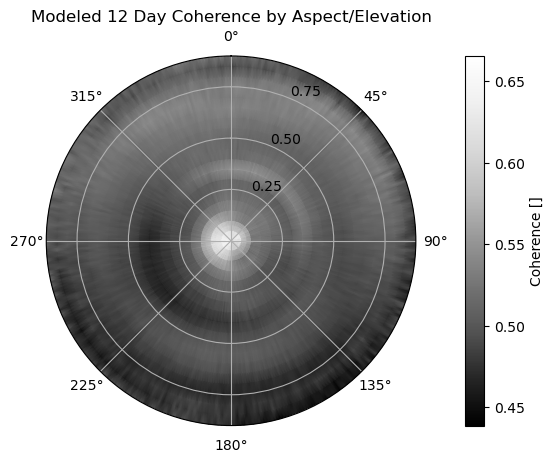

In [131]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([0.25, 0.5, 0.75])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_theta_offset(0.5*np.pi)
ax.set_theta_direction(-1)

h = ax.pcolormesh(theta,radii,z,edgecolors='face', cmap='Greys_r',shading='gouraud')
ax.set_title('Modeled 12 Day Coherence by Aspect/Elevation')
fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/non-snow')
fig.colorbar(h, pad = 0.1, label = 'Coherence []')
plt.savefig(fig_dir.joinpath('rose_12day_all.png'))

In [183]:
res = pd.DataFrame()
for stem, ds in dss.items():
    print(stem)
    cor12 = ds['cor'].sel(pol = 'VV').mean('time1').mean('time2')
    cor12 = cor12.rename('cor')
    a = ds['dem']
    ds['dem'].data = mean_normalize(a)
    cor12['dem'] = ds['dem']
    cor12['aspect'] = aspect(ds['dem'])
    res = pd.concat([res, cor12.to_dataframe().dropna()])

theta_step = 1
theta = np.arange(0, 360 + theta_step, theta_step)

radii_step = 0.05
radii = np.arange(0, 1 - radii_step, radii_step)

z = np.zeros((radii.size, theta.size))

from tqdm import tqdm
for i, t in enumerate(tqdm(theta)):
    low, high = t - theta_step/2, t + theta_step/2
    # if low < 0: low = 360 - np.abs(low)
    for j, (low_elev, high_elev) in enumerate(zip(radii, radii + radii_step)):
        z[j, i] = res[(res['aspect'] < high) & (res['aspect'] > low) & (res['dem'] > low_elev) & (res['dem'] < high_elev)]['cor'].mean()
theta = np.deg2rad(theta)

rockmt
alamos
grmesa
uticam
peeler
dorado
irnton
silver
fraser
lowman
stlake
sierra


100%|██████████| 361/361 [08:31<00:00,  1.42s/it]


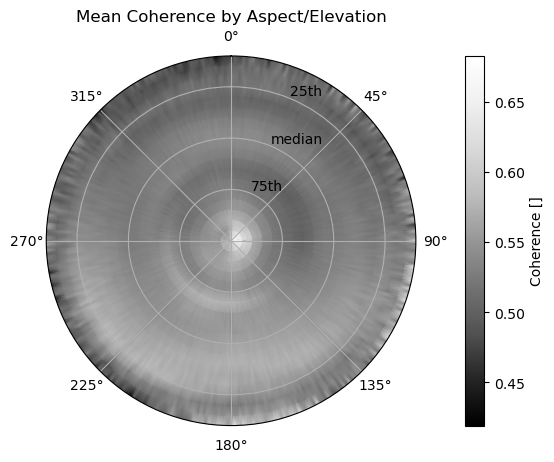

In [184]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([0.25, 0.5, 0.75],['75th', 'median', '25th'])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_theta_offset(0.5*np.pi)
ax.set_theta_direction(-1)

h = ax.pcolormesh(theta,radii[::-1],z,edgecolors='face', cmap='Greys_r',shading='gouraud')
ax.set_title('Mean Coherence by Aspect/Elevation')
fig.colorbar(h, pad = 0.1, label = 'Coherence []')

fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/non-snow')
plt.savefig(fig_dir.joinpath('rose_mean_cor_all.png'))

In [174]:
res = pd.DataFrame()
for stem, ds in dss.items():
    print(stem)
    cor12 = ds['cor'].sel(pol = 'VV').mean('time1').mean('time2').where((ds['tree_perc'] < 10) & (ds['inc'] < np.deg2rad(60)) & (ds['inc'] > np.deg2rad(30)))
    cor12 = cor12.rename('cor')
    a = ds['dem']
    ds['dem'].data = mean_normalize(a)
    cor12['dem'] = ds['dem']
    cor12['aspect'] = aspect(ds['dem'])
    res = pd.concat([res, cor12.to_dataframe().dropna()])

theta_step = 1
theta = np.arange(0, 360 + theta_step, theta_step)

radii_step = 0.05
radii = np.arange(0, 1 - radii_step, radii_step)

z = np.zeros((radii.size, theta.size))

from tqdm import tqdm
for i, t in enumerate(tqdm(theta)):
    low, high = t - theta_step/2, t + theta_step/2
    # if low < 0: low = 360 - np.abs(low)
    for j, (low_elev, high_elev) in enumerate(zip(radii, radii + radii_step)):
        z[j, i] = res[(res['aspect'] < high) & (res['aspect'] > low) & (res['dem'] > low_elev) & (res['dem'] < high_elev)]['cor'].mean()
theta = np.deg2rad(theta)

rockmt
alamos
grmesa
uticam
peeler
dorado
irnton
silver
fraser
lowman
stlake
sierra


100%|██████████| 361/361 [01:30<00:00,  3.97it/s]


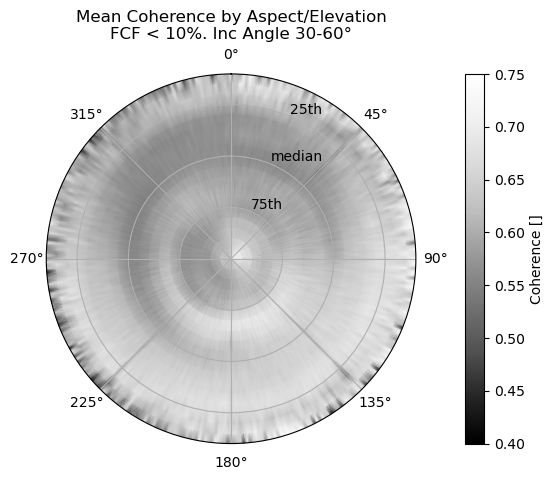

In [182]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([0.25, 0.5, 0.75],['75th', 'median', '25th'])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_theta_offset(0.5*np.pi)
ax.set_theta_direction(-1)

h = ax.pcolormesh(theta,radii[::-1],z,edgecolors='face', cmap='Greys_r',shading='gouraud', vmin = 0.4, vmax = 0.75)
ax.set_title('Mean Coherence by Aspect/Elevation\nFCF < 10%. Inc Angle 30-60°')
fig.colorbar(h, pad = 0.1, label = 'Coherence []')

fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/non-snow')
plt.savefig(fig_dir.joinpath('rose_mean_cor_tree_inc.png'))

In [163]:
theta_step = 1
theta = np.arange(0, 360 + theta_step, theta_step)

radii_step = 0.05
radii = np.arange(0, 1, radii_step)

zt = np.zeros((radii.size, theta.size))

from tqdm import tqdm
for i, t in enumerate(tqdm(theta)):
    low, high = t - theta_step/2, t + theta_step/2
    # if low < 0: low = 360 - np.abs(low)
    for j, r in enumerate(radii):
        low_elev, high_elev = r - radii_step/2, r + radii_step/2
        zt[j, i] = low_elev
theta = np.deg2rad(theta)

100%|██████████| 361/361 [00:00<00:00, 68349.38it/s]


In [164]:
radii

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

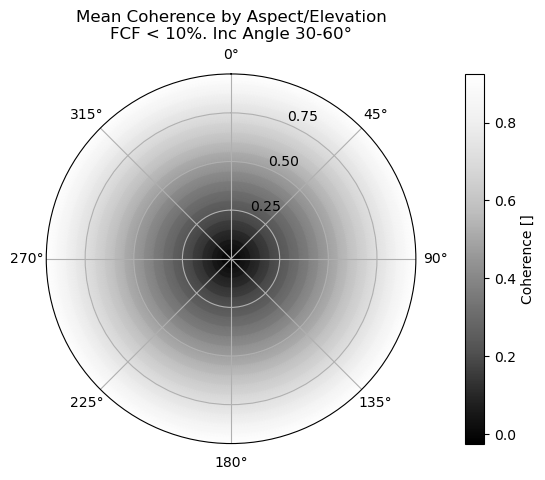

In [165]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([0.25, 0.5, 0.75])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_theta_offset(0.5*np.pi)
ax.set_theta_direction(-1)

h = ax.pcolormesh(theta,radii,zt,edgecolors='face', cmap='Greys_r',shading='gouraud')
ax.set_title('Mean Coherence by Aspect/Elevation\nFCF < 10%. Inc Angle 30-60°')
fig.colorbar(h, pad = 0.1, label = 'Coherence []')